# Árbol de decisión para especies de flores.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv("../datasets/iris/iris.csv")

In [4]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

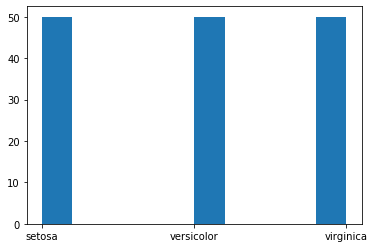

In [9]:
plt.hist(data.Species)

Vemos que es una muestra homogenea

In [10]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
colnames= data.columns.values.tolist()
predictors=colnames[:4]  # estas son las variables predictoras
target=colnames[4]       # esta es la variable objetivo, lo que queremos predecir

In [16]:
data["is_train"]= np.random.uniform(0,1,len(data))<=0.75  #generamos una columna con 75% de los datos 

In [21]:
data.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
145,6.7,3.0,5.2,2.3,virginica,True
146,6.3,2.5,5.0,1.9,virginica,True
147,6.5,3.0,5.2,2.0,virginica,True
148,6.2,3.4,5.4,2.3,virginica,True
149,5.9,3.0,5.1,1.8,virginica,False


In [24]:
train,test= data[data["is_train"]==True], data[data["is_train"]==False]  #generamos los dos dataset

In [25]:
train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True
5,5.4,3.9,1.7,0.4,setosa,True
6,4.6,3.4,1.4,0.3,setosa,True


In [26]:
test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,False
7,5.0,3.4,1.5,0.2,setosa,False
15,5.7,4.4,1.5,0.4,setosa,False
16,5.4,3.9,1.3,0.4,setosa,False


In [28]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99, min_samp)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

* Con el comando anterior, podemos entregar el criterio utilizado (entropia).
* Con min_samples_split es el numero minimo de muestras necesarias para hacer el split, es decir si no hay 20     nodos, no dividirá nada.
* Con random state genera estados aleatorios desde una misma semilla (99) en este caso, de esta forma mitiga el problema de que no se genere un arbol coherente
* Adicionalmente esta el parámetro min_samples_leaf que determina el minimo de nodos hoja.

**Los parámetros min se utilizan para asegurarnos que el arbol no haga un modelo trivial, es decir con una sola 
bifurcacion**

**Luego**

* El fit (modelar) se utiliza para entregar al arbol cuales son las varibles predictoras, y cual es la varibale target del 
    set de entrenamiento.

In [33]:
preds = tree.predict(test[predictors])   # he generado las predicciones del arbol considerando los predictores

(array([19.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0., 10.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

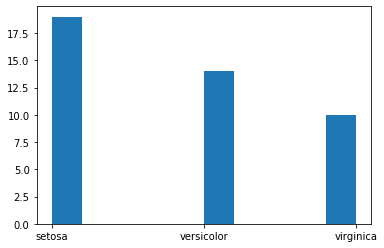

In [36]:
plt.hist(test[target])

In [34]:
pd.crosstab(test[target],preds,rownames=["Actual"],colnames=["Predictions"]) 

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,19,0,0
versicolor,0,11,3
virginica,0,0,10


Se realiza tabla para comparar el valor actual del data set vs la predicción que elaboro el modelo

Esto se lee de la siguiente forma:
* Todas las Setosas han sido clasificadas correctamente por el árbol 19/19
* No todas las versicolors han sido encontradas 11/14, ha determinado que 3 de las veriscolors eran virginicas
* Todas las virginicas fueron correctamente asignadas

**Debemos ahora ver una representación gráfica del arbol, ya que como el objeto tree no nos sirve para nada.**

# Visualización del árbol de decisión

In [37]:
from sklearn.tree import export_graphviz

In [40]:
with open("./Recursos/iris_dtree.dot","w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names= predictors)  ## feature_names que ocupe los nombres de..
    dotfile.close()

**Hemos creado el archivo .dot que representa el arbol y sus respectivas direcciones, nodos, entropia,etc. Sin embargo esto no es muy gráfico y es dificil de leer, por lo que usaremos lo siguiente para visualizar dicho arbol**

In [43]:
import os
from graphviz import Source

In [45]:
file = open("Recursos/iris_dtree.dot","r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.577\\nsamples = 107\\nvalue = [31, 36, 40]"] ;\n1 [label="entropy = 0.0\\nsamples = 31\\nvalue = [31, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.65\\nentropy = 0.998\\nsamples = 76\\nvalue = [0, 36, 40]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.391\\nsamples = 39\\nvalue = [0, 36, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n3 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 37\\nvalue = [0, 0, 37]"] ;\n2 -> 6 ;\n}'

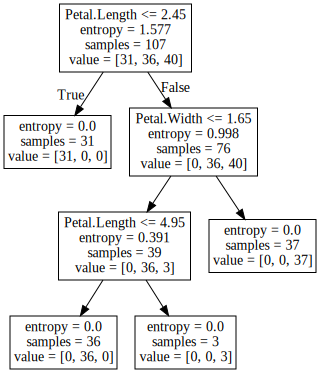

In [46]:
Source(text)

**Aquí podemos ver el paso logico que creo el modelo y como clasifico cada caso, vemos también que la profundidad del arbol fue 3, solo tiene 3 niveles y con eso fue necesario para encontrar una predicción. Esto implica que el dataset es bastante homogeneo. Además, vemos que no es necesaria la información de la longitud de los sepalos, no se requieren para hacer este análisis.**

## Cross Validation para la poda

Muchas veces el árbol generado no tiene la profundida óptima, por lo que veremos como ir podando este arbol de manera de generar un árbol con profundida optima

In [47]:
x = data[predictors]  # todos los datos, test y trainign
y = data[target]

In [48]:
tree= DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [50]:
from sklearn.model_selection import KFold

In [64]:
cv = KFold( n_splits=10,shuffle=True, random_state=1)
cv = cv.get_n_splits(x)

In [65]:
from sklearn.model_selection import cross_val_score

In [71]:
scores =cross_val_score(tree,x,y,scoring="accuracy",cv=cv,n_jobs=1)
score = np.mean(scores)

In [72]:
score

0.96

In [73]:
pre_score

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

Vemos que la eficacia del maximo de hojas situado en 5 está bastante bien, con un 96% de eficacia, ahora veremos que sucede cuando variamos el parámetro max_depth en el arbol

In [82]:
for i in range(1,11):
    tree= DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(x,y)
    cv = KFold( n_splits=10,shuffle=True, random_state=1)
    cv = cv.get_n_splits(x)
    scores =cross_val_score(tree,x,y,scoring="accuracy",cv=cv,n_jobs=1)
    score = np.mean(scores)
    print("score para i = ",i," es de : ", score)
    print(" ", tree.feature_importances_ , "\n")

score para i =  1  es de :  0.6666666666666667
  [0. 0. 1. 0.] 

score para i =  2  es de :  0.9466666666666667
  [0.         0.         0.66620285 0.33379715] 

score para i =  3  es de :  0.96
  [0.         0.         0.68976981 0.31023019] 

score para i =  4  es de :  0.96
  [0.         0.         0.66869158 0.33130842] 

score para i =  5  es de :  0.96
  [0.         0.         0.66869158 0.33130842] 

score para i =  6  es de :  0.96
  [0.         0.         0.66869158 0.33130842] 

score para i =  7  es de :  0.96
  [0.         0.         0.66869158 0.33130842] 

score para i =  8  es de :  0.96
  [0.         0.         0.66869158 0.33130842] 

score para i =  9  es de :  0.96
  [0.         0.         0.66869158 0.33130842] 

score para i =  10  es de :  0.96
  [0.         0.         0.66869158 0.33130842] 



**Podemos apreciar que desde 3 en adelante, la profundidad del arbol llega a su maximo de eficacia**

Además imprimimos cuales variables son las que generan mayor importancia a la hora de generar el arbol, con esto vemomos que la penultima variable es la mas importante es decir "longitud de los petalos"

Con esto ya podemos escoger los parámetros necesarios para maximizar la eficacia de nuestro arbol!

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
forest = RandomForestClassifier(n_jobs=3,oob_score = True , n_estimators=10000)
forest.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=3, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [92]:
decisiones=forest.oob_decision_function_

In [93]:
forest.oob_score_  # R^2

0.96